# **Supermarket Customer Data Analysis**
***

### <div align="center"> 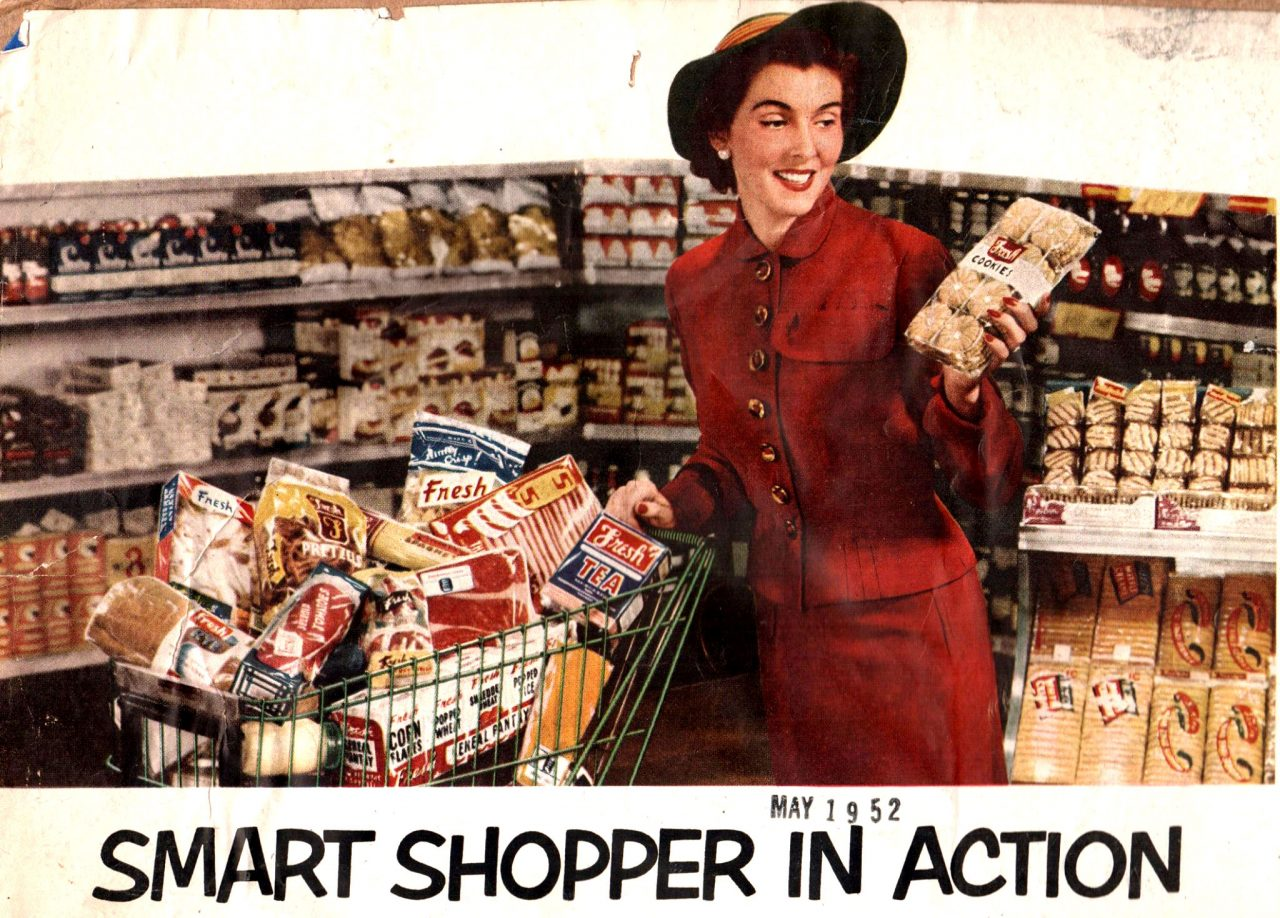  </div>

## Import Module

In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
import datetime as dt
import squarify
from IPython.display import display, HTML
from matplotlib.patches import FancyBboxPatch, FancyArrow
from itertools import combinations
from scipy import stats
from scipy.stats import normaltest, chi2_contingency
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_colwidth', 200)
import warnings 
warnings.filterwarnings('ignore')

## **I. Introduction**

### 1.1 Business Understanding

#### Context
A Supermarket Company operates in an area, providing a specific of products such as wine, fruit, meat, fish, candy, and gold. Also, providing a high-quality shopping experience for its customers with a choice of places to shop and various campaigns. This supermarket company is trying to increase profitability. In order to achieve this goal, the company collects and analyzes customer data that includes various aspects such as customer status, the amount spent on certain products, participation in promotional campaigns, and other information. This data shows significant differences in customer behavior, where some customers are active in making transactions and contributing greatly to total sales, while other customers tend to be less active. Understanding these differences will create more effective strategies to optimize sales and increase customer loyalty.

#### Stakeholder
***Manager Marketing in Marketing Department*** is a key stakeholder in this project. They are responsible to ***design personalized loyalty programs***, ***special offers***, and ***targeted marketing campaigns to retain these high-value customers*** and encourage them to spend even more. This analysis gives the manager with a ***data-driven approach*** to understand ***customer behavior***, ***improve customer engagement***, and ***optimize marketing efforts*** to drive business growth.

### 1.2 Problem Statement
This Supermarket Company want to understand their ***customer segmentation*** and analyze their ***promotion effectiveness*** in order to increase their profitability with ***RFM Analysis*** method. By understanding the different segments within their customer base, they can tailor marketing efforts that drive customer loyalty and encourage repeat purchases. This targeted approach not only increases spending through upselling and cross-selling but also ensures that marketing resources are used efficiently. By focusing on the most effective promotions and optimizing pricing strategies based on customer sensitivity, supermarkets can maximize profit margins and avoid markdown losses.

### 1.3 Goal
***The purpose of this analysis is to know:***

- **What factors can influence a company's profitability and how to increase those profitability?**
- **How do the aspects of each customer segment differ and what are the appropriate promotion or campaign for each customer segment?**

This analysis provides marketing departments with approaches to help them in better allocating marketing resources. By focusing efforts on high-value customers or those who are more likely to respond to a particular promotion, marketing departments can maximize their campaigns' return on investment (ROI).


## **II. Literature Review**

### 2.1 RFM Analysis

Recency, Frequency and Monetary (RFM) analysis is a powerful and recognized technique in database marketing. It is widely used to rank the customers based on their prior purchasing history. RFM analysis finds use in a wide range of applications involving a large number of customers such as online purchase, retailing, etc. This method groups the customers based on three dimensions, **Recency(R)**, **Frequency (F)**, and **Monetary (M)**

## **III. Analytical Approach**

### 3.1 Recency

This line of code calculates the ***Recency*** of each customer in a dataset. It first ***groups the data by "Customer ID" and finds the most recent invoice date for each customer***. Then, it ***subtracts this most recent invoice date*** from the ***fixed date*** to determine how much time has passed since the last purchase for each customer. The result is renamed with the column name ***Recency***.

$\text{Recency} = \text{Reference Date} − \text{Last Purchase Date}$

### 3.2 Frequency

This code calculates the number of ***unique purchase dates*** (frequency of purchases) for each customer by ***grouping the data by "Customer ID" and counting the distinct invoice dates***. The result is stored in a new DataFrame with a column named ***Frequency***.

$\text{Frequency}_i = \text{Count of Unique Invoice Dates for Customer } i$

### 3.3 Monetary

This code calculates the ***total amount spent by each customer***. It creates a ***new column "TotalPrice"*** by ***multiplying the quantity of items purchased by the price of each item***, giving the ***total price for each transaction***. Then, It ***groups the data by "Customer ID" and sums the "TotalPrice" for each customer***, giving the ***total amount spent by each customer***. The result is stored in a new DataFrame, with the column renamed to ***Monetary***.

$\text{TotalPrice}_{i,j} = \text{Quantity}_{i,j} \times \text{Price}_{i,j}$

$\text{Monetary}_i = \sum_{j=1}^{n_i} \text{TotalPrice}_{i,j}$

### 3.4 RFM Scoring
RFM score can be done in several ways. We could use our own business expertise and heuristics to make rankings that suit our customer base. For this case, we are going to go the statistical route and rank our customer using quartiles. The ranking of the individual RFM scores is done by dividing each of the RFM values into quartiles which creates four more or less equal buckets. We then rank each bucket **from one to five** with five being the best

## **IV. Data Analysis**

### 4.1 Data Understanding

This table provides a detailed overview of customer-related data from a supermarket customer, including **personal identifiers**, **demographic information**, **spending habits on various products**, **promotional campaign interactions**, and **purchase behaviors across different sales channels**.

| **Feature**            | **Description**                                               |
|------------------------|---------------------------------------------------------------|
| ID                     | Customer's unique identifier                                  |
| Year_Birth             | Customer's birth year                                         |
| Education              | Customer's education level                                    |
| Marital_Status         | Customer's marital status                                     |
| Income                 | Customer's yearly household income                            |
| Kidhome                | Number of children in customer's household                    |
| Teenhome               | Number of teenagers in customer's household                   |
| Dt_Customer            | Date of customer's enrollment with the company                |
| Recency                | Number of days since customer's last purchase                 |
| Complain               | 1 if the customer complained in the last 2 years, 0 otherwise |
| MntWines               | Amount spent on wine in last 2 years                          |
| MntFruits              | Amount spent on fruits in last 2 years                        |
| MntMeatProducts        | Amount spent on meat in last 2 years                          |
| MntFishProducts        | Amount spent on fish in last 2 years                          |
| MntSweetProducts       | Amount spent on sweets in last 2 years                        |
| MntGoldProds           | Amount spent on gold in last 2 years                          |
| NumDealsPurchases      | Number of purchases made with a discount                      |
| AcceptedCmp1           | 1 if the customer accepted the offer in the 1st campaign, 0 otherwise |
| AcceptedCmp2           | 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise |
| AcceptedCmp3           | 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise |
| AcceptedCmp4           | 1 if the customer accepted the offer in the 4th campaign, 0 otherwise |
| AcceptedCmp5           | 1 if the customer accepted the offer in the 5th campaign, 0 otherwise |
| Response               | 1 if the customer accepted the offer in the last campaign, 0 otherwise |
| NumWebPurchases        | Number of purchases made through the company’s website        |
| NumCatalogPurchases    | Number of purchases made using a catalog                      |
| NumStorePurchases      | Number of purchases made directly in stores                   |
| NumWebVisitsMonth      | Number of visits to the company’s website in the last month   |


In [215]:
# Read the 'Supermarket Customers' data in a CSV file format
sc = pd.read_csv('Supermarket Customers.csv')
display(sc.head(3),sc.tail(3))

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25/01/2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24/01/2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15/10/2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [216]:
# Columns Name
sc.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [217]:
# Data info and description
display(sc.info(),sc.describe(),sc.describe(include='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

None

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31/08/2012
freq,1127,864,12


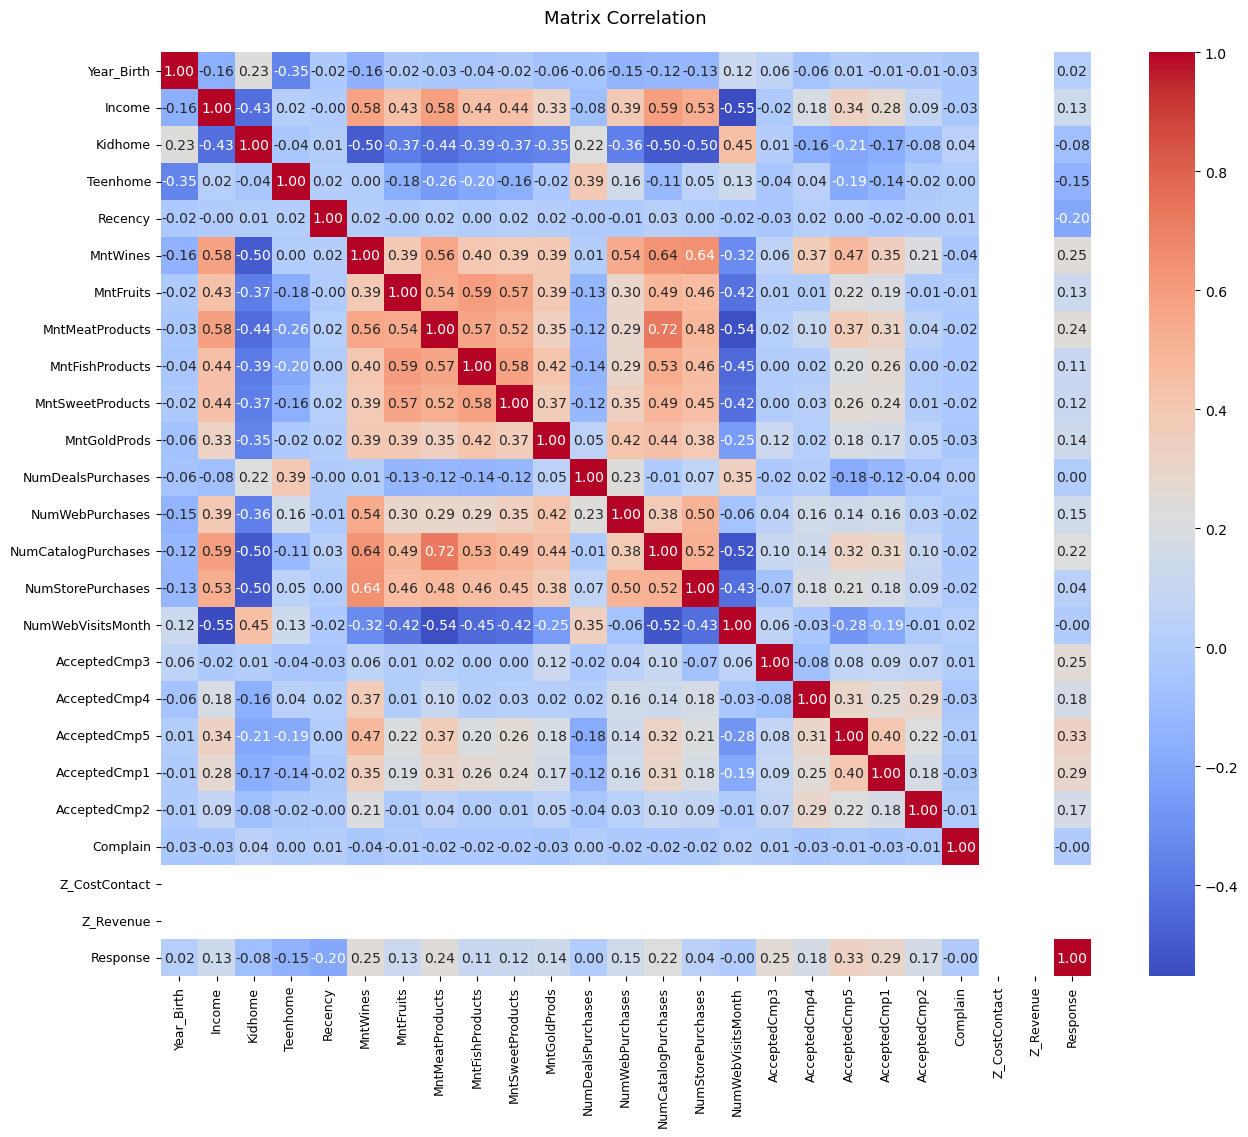

In [218]:
# Check the correlation between each column
corr_matrix = sc.drop('ID', axis=1).select_dtypes(include=[float, int]).corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True,fmt = ".2f", cmap='coolwarm')
plt.yticks(size=9)
plt.xticks(size=9)
plt.title('Matrix Correlation\n',size=13)
plt.show()

In [219]:
print("Raw SUPERMARKET CUSTOMERS Data\n")
print(f"Number of rows in dataset is: {sc.shape[0]}")
print(f"Number of columns in dataset is: {sc.shape[1]}\n")
print('TABLE UNIQUE OF COLUMN:')
# Function to check unique value
def check_uv(sc):
    sc = sc.drop(columns=['ID'], errors='ignore')
    data = {
        'Column Name': [],
        'Data Type': [],
        'Unique Values Count': [],
        'Unique Values': []
    }
    
    for col in sc.columns:
        unique_values = sc[col].unique()
        data['Column Name'].append(col)
        data['Data Type'].append(sc[col].dtype)
        data['Unique Values Count'].append(len(unique_values))
        data['Unique Values'].append(unique_values)
    
    uv = pd.DataFrame(data)
    return uv

# Check for unique value
uv=check_uv(sc)
uv

Raw SUPERMARKET CUSTOMERS Data

Number of rows in dataset is: 2240
Number of columns in dataset is: 29

TABLE UNIQUE OF COLUMN:


,Column Name,Data Type,Unique Values Count,Unique Values
0,Year_Birth,int64,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 197..."
1,Education,object,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
2,Marital_Status,object,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
3,Income,float64,1975,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 5860..."
4,Kidhome,int64,3,"[0, 1, 2]"
5,Teenhome,int64,3,"[0, 1, 2]"
6,Dt_Customer,object,663,"[04/09/2012, 08/03/2014, 21/08/2013, 10/02/2014, 19/01/2014, 09/09/2013, 13/11/2012, 08/05/2013, 06/06/2013, 13/03/2014, 15/11/2013, 10/10/2012, 24/11/2012, 24/12/2012, 31/08/2012, 28/03/2013, 03/..."
7,Recency,int64,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 2..."
8,MntWines,int64,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 1..."
9,MntFruits,int64,158,"[88, 1, 49, 4, 43, 42, 65, 10, 0, 5, 16, 61, 2, 14, 22, 80, 17, 3, 100, 12, 34, 8, 76, 11, 164, 18, 6, 50, 19, 37, 120, 9, 51, 35, 26, 7, 40, 59, 36, 107, 111, 105, 23, 60, 46, 172, 81, 106, 194, ..."


### 4.2 Data Cleaning

We need to make sure the **data is clean** before starting the analysis. As a reminder, we should check for:
- **Consistent formatting**
- **Missing value** 
- **Duplicate value**

#### 4.2.1 Consistent Formatting

***Below here***, there are several types of columns that are **not formatted properly**. We need to change the format first. 

In [223]:
# Change format of column Dt_Customer
sc['Dt_Customer'] = pd.to_datetime(sc['Dt_Customer'], format="%d/%m/%Y", dayfirst=True)

In [224]:
# Change format of column ID, Cmp1 Received, Cmp2 Received, Cmp3 Received, Cmp4 Received, Cmp5 Received, Complaint, Response
sc['ID'] = sc['ID'].astype('object')
sc['AcceptedCmp1'] = sc['AcceptedCmp1'].astype('object')
sc['AcceptedCmp2'] = sc['AcceptedCmp2'].astype('object')
sc['AcceptedCmp3'] = sc['AcceptedCmp3'].astype('object')
sc['AcceptedCmp4'] = sc['AcceptedCmp4'].astype('object')
sc['AcceptedCmp5'] = sc['AcceptedCmp5'].astype('object')
sc['Complain'] = sc['Complain'].astype('object')
sc['Response'] = sc['Response'].astype('object')

In addition, there are **two more columns**, such as 'Z_CostContact' and 'Z_Revenue', which **are not defined in the Data Dictionary** in the dataset. In order to avoid uncertain assumptions and uninterrupted analysis, these two columns will be **dropped** with other unneeded columns .

In [226]:
# Removed column Z_CostContact and Z_Revenue
sc.drop(columns='Z_CostContact', inplace=True)
sc.drop(columns='Z_Revenue', inplace=True)
# Removed unneeded columns for analysis
sc.drop(columns='Complain', inplace=True)
sc.drop(columns='Response', inplace=True)
sc.drop(columns='NumWebVisitsMonth', inplace=True)

In [227]:
# Data info and description After Formatting
display(sc.info(),sc.describe(),sc.describe(include='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   object        
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

None

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179
min,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000
50%,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000
75%,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000
max,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000
std,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958


,ID,Education,Marital_Status,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
count,2240,2240,2240,2240,2240,2240,2240,2240
unique,2240,5,8,2,2,2,2,2
top,5524,Graduation,Married,0,0,0,0,0
freq,1,1127,864,2077,2073,2077,2096,2210


Then, there are 3 uncommon categories that will be included in other categories, such as 'Graduation', 'Basic', '2n Cycle'.

'2n Cycle' will be changed to 'Master'

In [229]:
sc.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,0,0,0,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,0,0,0,0,0


In [230]:
# Changing education 2n Cycle to Master
sc.loc[sc['Education']=='2n Cycle','Education']='Master'

In [231]:
# Checking proportion of Education 'Graduation' and 'Basic' 
number_of_graduation_data = len(sc[sc['Education']=='Graduation'])
number_of_basic_data = len(sc[sc['Education']=='Basic'])
print(f'The number of Education Data "Graduation" is {number_of_graduation_data} and {number_of_graduation_data/sc.shape[0]*100:.2f}% of the total data')
print(f'The number of Education Data "Basic" is {number_of_basic_data} and {number_of_basic_data/sc.shape[0]*100:.2f}% of the total data')

The number of Education Data "Graduation" is 1127 and 50.31% of the total data
The number of Education Data "Basic" is 54 and 2.41% of the total data


In [232]:
# Add Customer Age
age=2024-sc['Year_Birth']
sc.insert(2,'Customer_Age',age)

In [233]:
# Check relation between the Graduate and Basic categories to customer age and income.
display(
    sc[['Customer_Age','Education']][sc['Education']=='Graduation'].groupby(by='Customer_Age').count().head(),
    sc[['Customer_Age','Education']][sc['Education']=='Basic'].groupby(by='Customer_Age').count().head(),
    sc[['Education','Income']].groupby(by='Education').mean().rename(columns={'Income':'Income (Average)'}),
    sc[['Education','Income']].groupby(by='Education').median().rename(columns={'Income':'Income (Median)'}),
)

,Education
Customer_Age,
29,3
30,3
31,5
32,6
33,7


,Education
Customer_Age,
28,1
32,4
33,1
34,2
35,2


,Income (Average)
Education,
Basic,20306.259259
Graduation,52720.373656
Master,51046.969912
PhD,56145.313929


,Income (Median)
Education,
Basic,20744.0
Graduation,52028.5
Master,49605.0
PhD,55212.0


In [234]:
percentage = (sc[sc['Education'] == 'Graduation']['Income'].mean() / sc[sc['Education'] == 'Basic']['Income'].mean() - 1) * 100
percentage

159.6262215645381

`Intrepertation`

Based on the details of the Graduate and Basic data above, the **minimum age** of the two categories is the same, **28 and 29**. Hence age **cannot be a strong reason to determine the actual category**.

Meanwhile, in the **average and median income data**, it was found that **the income in the graduate category was higher** than the basic category. The average income in the graduate category was **159.63**% higher than the basic category.

We can assumed, based on  National Center for Education Statistics (NCES), it's known that the income of **Bachelor graduates is higher than the High School category**. We can change the two categories to:
- Basic to High School
- Graduate to Bachelor

In [236]:
# Changing basic education and graduation
sc.loc[sc['Education']=='Basic','Education']='High School'
sc.loc[sc['Education']=='Graduation','Education']='Bachelor'

Then, there are 4 uncommon categories such as 'Together', 'Alone', 'Absurd', and 'YOLO'.

'Together' will be changed to 'Married'

In [238]:
# Changing status 'Together' to 'Married'
sc.loc[sc['Marital_Status']=='Together','Marital_Status']='Married'

In [239]:
# Status Marital Values Counts
sc['Marital_Status'].value_counts()

Marital_Status
Married     1444
Single       480
Divorced     232
Widow         77
Alone          3
Absurd         2
YOLO           2
Name: count, dtype: int64

In [240]:
total_status_diff = sc['Marital_Status'].value_counts().loc[['YOLO', 'Absurd', 'Alone']].sum()
print(f'The number of Marital Statuses: Alone, Absurd, and YOLO is {total_status_diff} which is {total_status_diff/sc.shape[0]*100:.2f}% of the total data')

The number of Marital Statuses: Alone, Absurd, and YOLO is 7 which is 0.31% of the total data


In [241]:
status_diff = pd.concat([sc[sc['Marital_Status']=='Alone'],sc[sc['Marital_Status']=='Absurd'],sc[sc['Marital_Status']=='YOLO']])
status_diff

,ID,Year_Birth,Customer_Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
131,433,1958,66,Master,Alone,61331.0,1,1,2013-03-10,42,534,5,47,0,5,41,5,11,1,6,0,0,0,0,0
138,7660,1973,51,PhD,Alone,35860.0,1,1,2014-05-19,37,15,0,8,4,2,20,2,1,1,2,1,0,0,0,0
153,92,1988,36,Bachelor,Alone,34176.0,1,0,2014-05-12,12,5,7,24,19,14,20,4,3,0,4,0,0,0,0,0
2093,7734,1993,31,Bachelor,Absurd,79244.0,0,0,2012-12-19,58,471,102,125,212,61,245,1,4,10,7,0,0,1,1,0
2134,4369,1957,67,Master,Absurd,65487.0,0,0,2014-01-10,48,240,67,500,199,0,163,3,3,5,6,0,0,0,0,0
2177,492,1973,51,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,0,0,0,0,0
2202,11133,1973,51,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,0,0,0,0,0


`Intrepertation`

Since the data with Marital Status: **Alone, Absurd and YOLO only amount to 7**, which is **0.31% of the total** data and cannot be defined or changed based on its relationship with other data columns. Then this data **can be deleted**.

In [243]:
# Marital Status row data deletion: Single, Absurd, and YOLO
sc = sc.drop(sc[sc['Marital_Status']=='Alone'].index)
sc = sc.drop(sc[sc['Marital_Status']=='Absurd'].index)
sc = sc.drop(sc[sc['Marital_Status']=='YOLO'].index)

In [244]:
# Status Marital Values Counts After Deletion
display(sc['Marital_Status'].unique(),
    sc['Marital_Status'].value_counts()
)

array(['Single', 'Married', 'Divorced', 'Widow'], dtype=object)

Marital_Status
Married     1444
Single       480
Divorced     232
Widow         77
Name: count, dtype: int64

#### 4.2.2 Missing Value

Next, empty data will be checked. In this section, empty data can be handled in the following ways:

1. ***Deleting rows or columns*** that fill in missing values. This method is not recommended if the missing value has a high number compared to the amount of data available

2. ***Filling in missing data***. This method is more recommended and there are several methods to fill in the missing values. The best way is to fill in the empty data with data that is close to the actual data.

In this case, empty data will be filled in by **domain knowledge** or **statistically** based on other columns. If there are still columns that cannot be filled, they will be filled with the **mean, median or mode**. **Deleting data** is the last option.

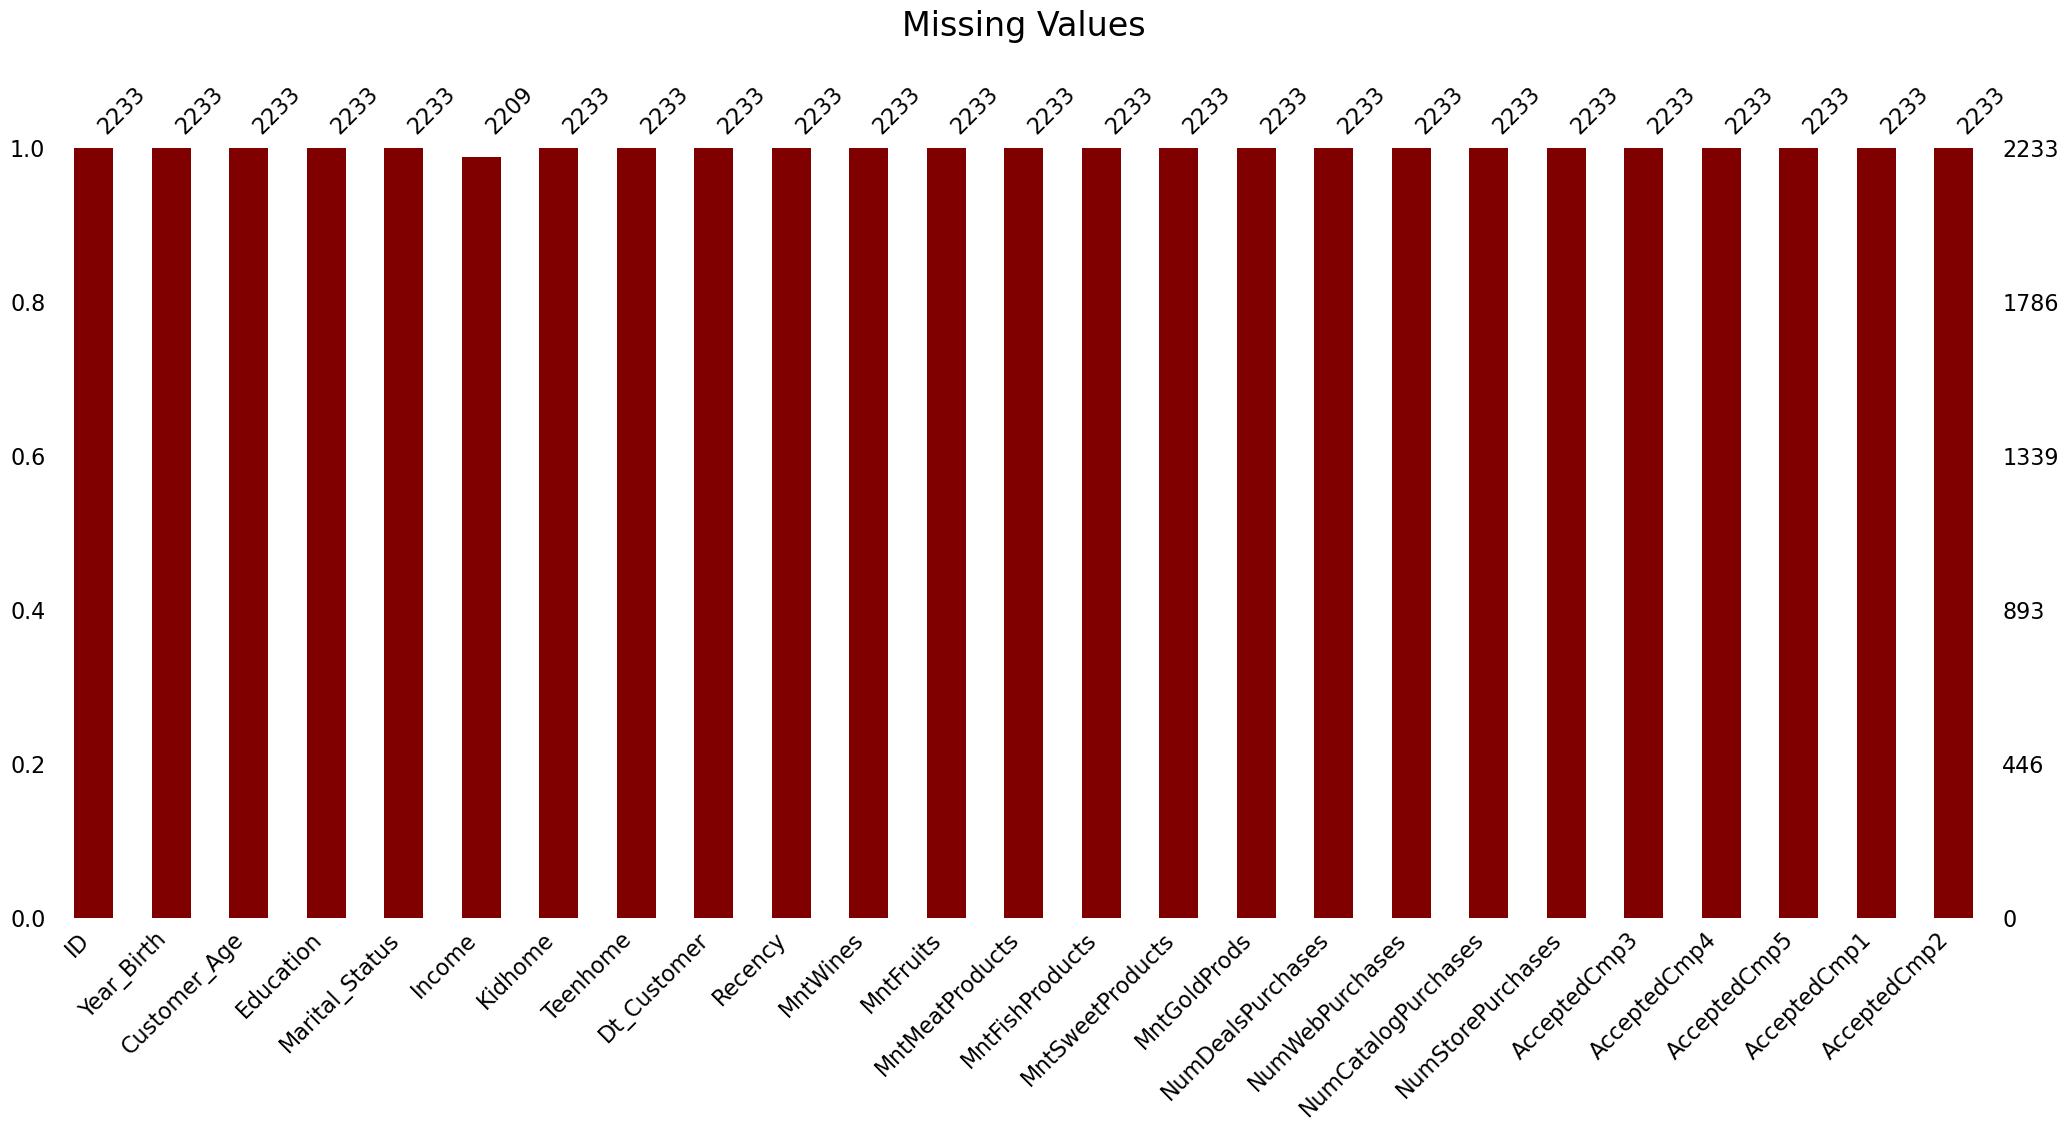

Table Missing Values Count and Proportion per Column


,Column,Missing Values (count),Missing Proportion (%)
0,Income,24,1.07 %
1,ID,0,0.00 %
2,MntFishProducts,0,0.00 %
3,AcceptedCmp1,0,0.00 %
4,AcceptedCmp5,0,0.00 %
5,AcceptedCmp4,0,0.00 %
6,AcceptedCmp3,0,0.00 %
7,NumStorePurchases,0,0.00 %
8,NumCatalogPurchases,0,0.00 %
9,NumWebPurchases,0,0.00 %


In [247]:
# Visualize Bar Plot 
msno.bar(sc, color='maroon')
plt.title("Missing Values\n",size=24)
plt.show()

#Checking Missing Frequency
mf_sc=sc.isnull().sum().sort_values(ascending = False).reset_index()
mf_sc.columns = ['Column', 'Missing Values (count)']

# Checking Missing Proportion
mp_sc=(sc.isnull().sum() / sc.shape[0] * 100).sort_values(ascending = False).reset_index()
mp_sc.columns = ['Column', 'Missing Proportion (%)']
mp_sc['Missing Proportion (%)'] = mp_sc['Missing Proportion (%)'].apply(lambda x: f"{x:.2f} %")

# Setting the 'Column' as index to align them side by side
mf_sc.set_index('Column', inplace=True)
mp_sc.set_index('Column', inplace=True)

# Concatenating the DataFrames side by side
table = pd.concat([mf_sc, mp_sc], axis=1)
table.reset_index(inplace=True)
print("Table Missing Values Count and Proportion per Column")
table

`Intrepertation`

Based on the result above, there is empty data in the Income column with a **total of 24 data (1.07% of the total data)**. To fill in the empty columns, the data will be filled in according to its relationship to the other data columns. To do this, a **correlation check** will be tried between **age**, **number of children**, and **customer income**.

In [249]:
# Number of Children
children = sc['Kidhome'] + sc['Teenhome']
sc.insert(5,'Total_Children',children)

In [250]:
sc.head()

,ID,Year_Birth,Customer_Age,Education,Marital_Status,Total_Children,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
0,5524,1957,67,Bachelor,Single,0,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,0,0,0,0,0
1,2174,1954,70,Bachelor,Single,2,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,0,0,0,0,0
2,4141,1965,59,Bachelor,Married,0,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,0,0,0,0,0
3,6182,1984,40,Bachelor,Married,1,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,0,0,0,0,0
4,5324,1981,43,PhD,Married,1,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,0,0,0,0,0


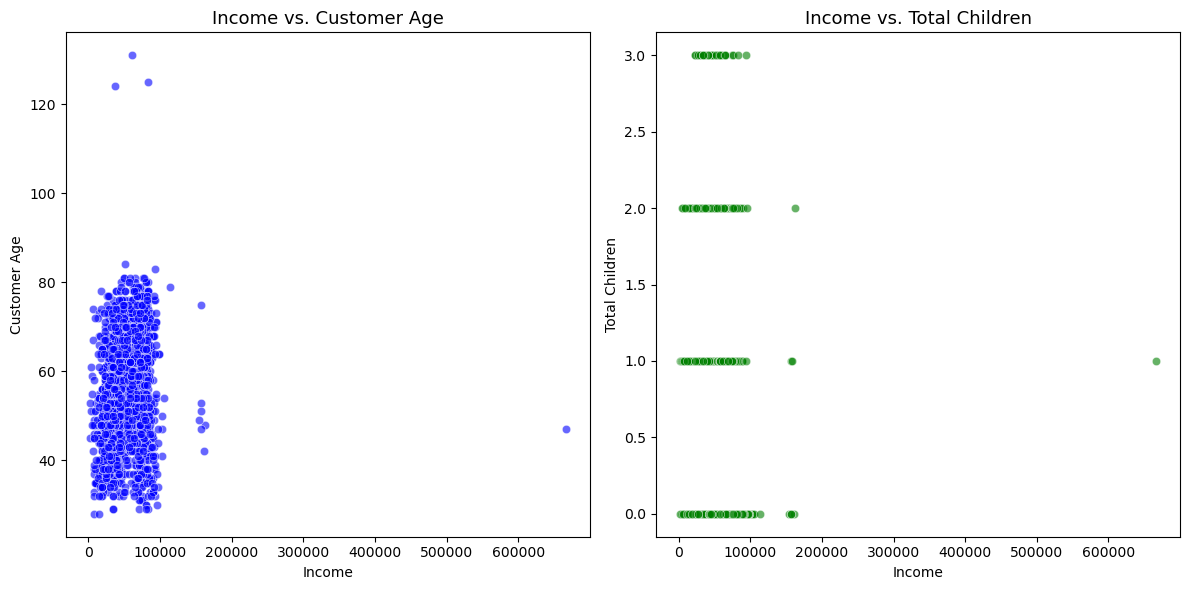

In [251]:
# Create a figure and axis for side-by-side scatter plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), layout='tight')

# Scatter plot: Customer Age vs. Income using Seaborn
sns.scatterplot(ax=axes[0], x='Income', y='Customer_Age', data=sc, color='blue', alpha=0.6)
axes[0].set_title('Income vs. Customer Age', size=13)
axes[0].set_ylabel('Customer Age',size=10)
axes[0].set_xlabel('Income',size=10)

# Scatter plot: Total Children vs. Income using Seaborn
sns.scatterplot(ax=axes[1], x='Income', y='Total_Children', data=sc, color='green', alpha=0.6)
axes[1].set_title('Income vs. Total Children', size=13)
axes[1].set_ylabel('Total Children',size=10)
axes[1].set_xlabel('Income',size=10)

plt.show()

In [252]:
# Check correlation with Spearman method since there is non-normal distribution
sc[['Customer_Age','Income','Total_Children']].corr(method='spearman')

,Customer_Age,Income,Total_Children
Customer_Age,1.000000,0.217326,0.086408
Income,0.217326,1.000000,-0.375448
Total_Children,0.086408,-0.375448,1.000000


Based on the test results above, it was found that the data was **not normally distributed** (**there are outliers**) and there was **no strong correlation** between **income, customer age, or number of children**. While there is a difference in income with education segmentation as follows:

In [254]:
display(
    sc[['Education','Income']].groupby(by='Education').mean().rename(columns={'Income':'Income (Average)'}),
    sc[['Education','Income']].groupby(by='Education').median().rename(columns={'Income':'Income (Median)'}))

,Income (Average)
Education,
Bachelor,52713.210952
High School,20306.259259
Master,51003.055062
PhD,56220.025105


,Income (Median)
Education,
Bachelor,52028.5
High School,20744.0
Master,49572.0
PhD,55236.0


`Intreperation`

In this case, although the average and median in the education column do not have much difference, the filling of empty income data in the education segmentation will be filled with the median. This is because there are outliers and the data is not normally distributed, so the data is filled using the median value.

In [256]:
# Filling missing value of Income
sc.loc[(sc['Income'].isna()) & (sc['Education']=='Bachelor'),'Income']= sc[sc['Education'] == 'Bachelor']['Income'].median()
sc.loc[(sc['Income'].isna()) & (sc['Education']=='High School'),'Income']= sc[sc['Education'] == 'High School']['Income'].median()
sc.loc[(sc['Income'].isna()) & (sc['Education']=='Master'),'Income']= sc[sc['Education'] == 'Master']['Income'].median()
sc.loc[(sc['Income'].isna()) & (sc['Education']=='PhD'),'Income']= sc[sc['Education'] == 'PhD']['Income'].median()

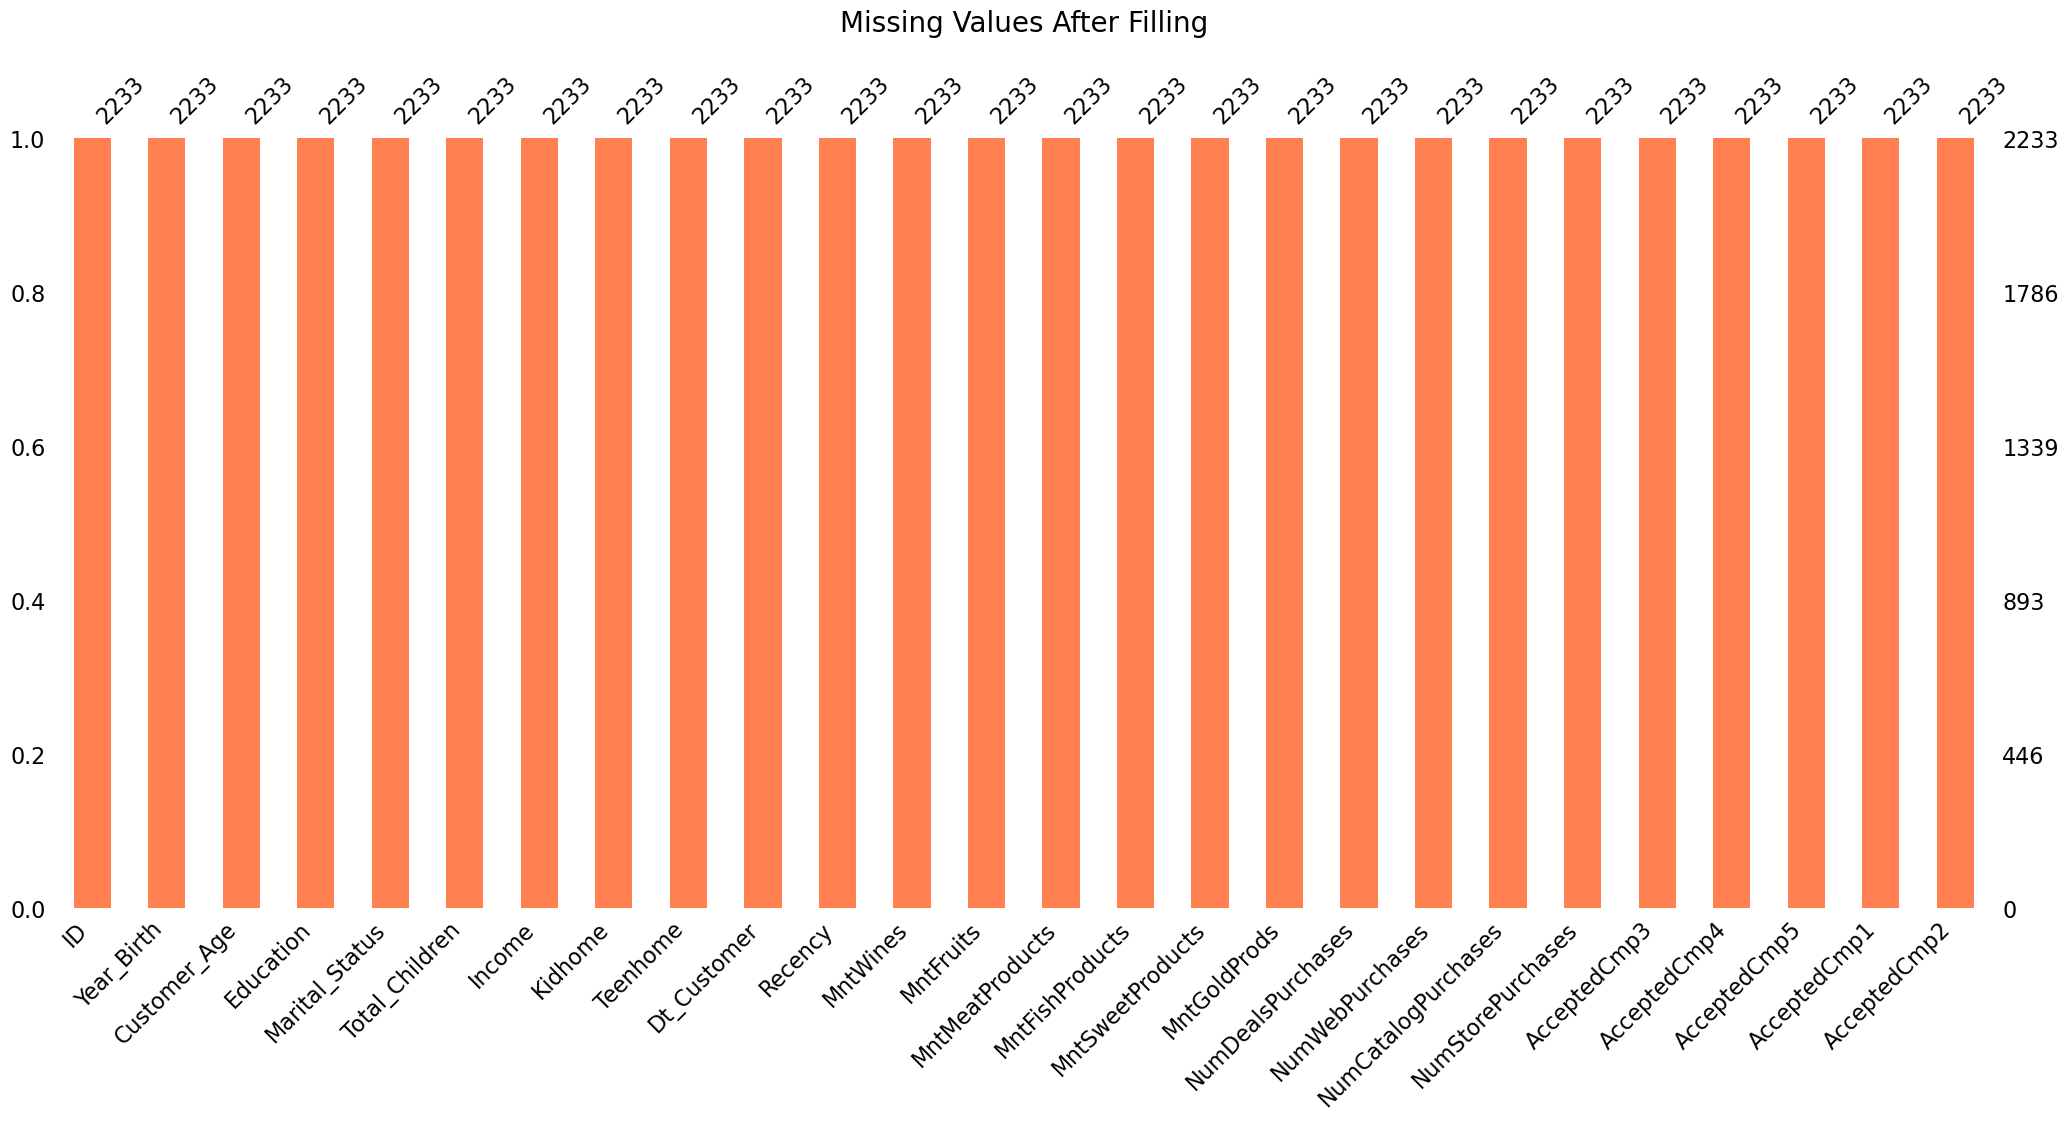

Table: Missing Values Count and Proportion per Column After Handling


,Column,Missing Values (count),Missing Proportion (%)
0,ID,0,0.00 %
1,Year_Birth,0,0.00 %
2,AcceptedCmp1,0,0.00 %
3,AcceptedCmp5,0,0.00 %
4,AcceptedCmp4,0,0.00 %
5,AcceptedCmp3,0,0.00 %
6,NumStorePurchases,0,0.00 %
7,NumCatalogPurchases,0,0.00 %
8,NumWebPurchases,0,0.00 %
9,NumDealsPurchases,0,0.00 %


In [257]:
# Visualize Bar Plot 
msno.bar(sc, color='coral')
plt.title("Missing Values After Filling\n",size=20)
plt.show()

from IPython.display import display, HTML
#Checking Missing Frequency
mf_sc=sc.isnull().sum().sort_values(ascending = False).reset_index()
mf_sc.columns = ['Column', 'Missing Values (count)']

# Checking Missing Proportion
mp_sc=(sc.isnull().sum() / sc.shape[0] * 100).sort_values(ascending = False).reset_index()
mp_sc.columns = ['Column', 'Missing Proportion (%)']
mp_sc['Missing Proportion (%)'] = mp_sc['Missing Proportion (%)'].apply(lambda x: f"{x:.2f} %")

# Setting the 'Column' as index to align them side by side
mf_sc.set_index('Column', inplace=True)
mp_sc.set_index('Column', inplace=True)

# Concatenating the DataFrames side by side
table = pd.concat([mf_sc, mp_sc], axis=1)
table.reset_index(inplace=True)
print("Table: Missing Values Count and Proportion per Column After Handling")
table

In [258]:
display(
    sc[['Education','Income']].groupby(by='Education').mean().rename(columns={'Income':'Income (Average)'}),
    sc[['Education','Income']].groupby(by='Education').median().rename(columns={'Income':'Income (Median)'}))

,Income (Average)
Education,
Bachelor,52706.516000
High School,20306.259259
Master,50983.005254
PhD,56209.838509


,Income (Median)
Education,
Bachelor,52028.5
High School,20744.0
Master,49572.0
PhD,55236.0


**No more empty data**. **Median** and **Mean** are also **not disturbed**.

#### 4.2.3 Duplicate Value

In [261]:
# Checking Duplicate Value
print(f'Duplicate entries based on ID: {sc[sc.duplicated(subset="ID")].shape[0]}')
print(f'Duplicate entries: {sc.duplicated().sum()}')
print(f'Percentage duplicate rows: {round((sc.duplicated().sum()/sc.shape[0])*100,2)} %\n')

Duplicate entries based on ID: 0
Duplicate entries: 0
Percentage duplicate rows: 0.0 %



Based on the checking above, there is **no Duplicate Value between Row**, hence **no need to handle** Duplicate Value.

#### 4.2.4 Cleaned Data

In [264]:
print("Cleaned SUPERMARKET CUSTOMERS Data\n")
print(f"Number of rows in dataset is: {sc.shape[0]}")
print(f"Number of columns in dataset is: {sc.shape[1]}\n")
# print("Missing Frequency:")
# print(sc.isnull().sum().sort_values(ascending = False), "\n")
# print("Missing Proportion:")
# print((sc.isnull().sum() / sc.shape[0]).sort_values(ascending = False),"\n")

print('TABLE UNIQUE OF COLUMN:')
# Function to check for inconsistencies and return as a DataFrame
def check_uv(sc):
    data = {
        'Column Name': [],
        'Data Type': [],
        'Unique Values Count': [],
        'Unique Values': []
    }
    
    for col in sc.columns:
        unique_values = sc[col].unique()
        data['Column Name'].append(col)
        data['Data Type'].append(sc[col].dtype)
        data['Unique Values Count'].append(len(unique_values))
        data['Unique Values'].append(unique_values)
    
    uv = pd.DataFrame(data)
    return uv

# Check for inconsistencies and store in DataFrame
uv=check_uv(sc)
uv

Cleaned SUPERMARKET CUSTOMERS Data

Number of rows in dataset is: 2233
Number of columns in dataset is: 26

TABLE UNIQUE OF COLUMN:


,Column Name,Data Type,Unique Values Count,Unique Values
0,ID,object,2233,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710,..."
1,Year_Birth,int64,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 197..."
2,Customer_Age,int64,59,"[67, 70, 59, 40, 43, 57, 53, 39, 50, 74, 41, 48, 65, 72, 37, 78, 44, 75, 42, 45, 73, 55, 38, 35, 61, 54, 51, 81, 49, 28, 56, 60, 47, 46, 69, 58, 36, 76, 66, 52, 64, 79, 33, 62, 71, 63, 68, 32, 124..."
3,Education,object,4,"[Bachelor, PhD, Master, High School]"
4,Marital_Status,object,4,"[Single, Married, Divorced, Widow]"
5,Total_Children,int64,4,"[0, 2, 1, 3]"
6,Income,float64,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, 52028.5, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, ..."
7,Kidhome,int64,3,"[0, 1, 2]"
8,Teenhome,int64,3,"[0, 1, 2]"
9,Dt_Customer,datetime64[ns],663,"[2012-09-04 00:00:00, 2014-03-08 00:00:00, 2013-08-21 00:00:00, 2014-02-10 00:00:00, 2014-01-19 00:00:00, 2013-09-09 00:00:00, 2012-11-13 00:00:00, 2013-05-08 00:00:00, 2013-06-06 00:00:00, 2014-0..."


In [265]:
# Data info and description
display(sc.info(),sc.describe(),sc.describe(include='object'))

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2233 non-null   object        
 1   Year_Birth           2233 non-null   int64         
 2   Customer_Age         2233 non-null   int64         
 3   Education            2233 non-null   object        
 4   Marital_Status       2233 non-null   object        
 5   Total_Children       2233 non-null   int64         
 6   Income               2233 non-null   float64       
 7   Kidhome              2233 non-null   int64         
 8   Teenhome             2233 non-null   int64         
 9   Dt_Customer          2233 non-null   datetime64[ns]
 10  Recency              2233 non-null   int64         
 11  MntWines             2233 non-null   int64         
 12  MntFruits            2233 non-null   int64         
 13  MntMeatProducts      2233 non-null   i

None

,Year_Birth,Customer_Age,Total_Children,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.00000
mean,1968.790864,55.209136,0.950291,52240.043215,0.444245,0.506046,2013-07-10 10:37:08.034034688,49.172414,304.033587,26.300940,167.113300,37.445141,27.108374,43.903269,2.321093,4.081505,2.661890,5.79176
min,1893.000000,28.000000,0.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1959.000000,47.000000,0.000000,35523.000000,0.000000,0.000000,2013-01-17 00:00:00,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.00000
50%,1970.000000,54.000000,1.000000,51518.000000,0.000000,0.000000,2013-07-09 00:00:00,50.000000,173.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.00000
75%,1977.000000,65.000000,1.000000,68316.000000,1.000000,1.000000,2013-12-30 00:00:00,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.00000
max,1996.000000,131.000000,3.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.00000
std,11.979248,11.979248,0.751785,25063.548860,0.538528,0.544675,NaN,28.962114,336.953019,39.779532,225.870588,54.461569,41.321700,52.009602,1.932181,2.776886,2.921749,3.25473


,ID,Education,Marital_Status,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
count,2233,2233,2233,2233,2233,2233,2233,2233
unique,2233,4,4,2,2,2,2,2
top,5524,Bachelor,Married,0,0,0,0,0
freq,1,1125,1444,2071,2066,2071,2090,2203


In [389]:
sc.to_csv('SUPERMARKET CUSTOMERS CLEANED.csv')

### 4.3 Data Analysis

After the data cleaning stage is complete and the data is clean from empty data and duplicate data, it will continue to the **data analysis** stage to find out which customer segments should be prioritized for targeted marketing campaigns and Effectiveness the promotional campaigns across different customer segments.

#### 4.3.1 Recency

Recency is **how long it took** a customer to make their last transaction.

In [271]:
sc_RFM=sc.copy()
sc_RFM[['ID','Recency']].head()

,ID,Recency
0,5524,58
1,2174,38
2,4141,26
3,6182,26
4,5324,94


#### 4.3.2 Frequency

Frequency is **how often** a customer makes a transaction. Frequency can be obtained from the total transactions (*number of purchase*) made on the **company's website**, **catalog**, and **directly from the store**.

In [274]:
sc_RFM['Frequency']=sc['NumWebPurchases']+sc['NumCatalogPurchases']+sc['NumStorePurchases']
sc_RFM[['ID','Frequency']].head()

,ID,Frequency
0,5524,22
1,2174,4
2,4141,20
3,6182,6
4,5324,14


#### 4.3.3 Monetary

Monetary is the **amount of customer spending** in each transaction. Monetary value can be obtained from the **total customer spending on all supermarket products**.

In [277]:
sc_RFM['Monetary']=sc['MntWines']+sc['MntFruits']+sc['MntMeatProducts']+sc['MntFishProducts']+sc['MntSweetProducts']+sc['MntGoldProds']
sc_RFM[['ID','Monetary']].head()

,ID,Monetary
0,5524,1617
1,2174,27
2,4141,776
3,6182,53
4,5324,422


#### 4.3.4 RFM Score

##### RECENCY SCORE

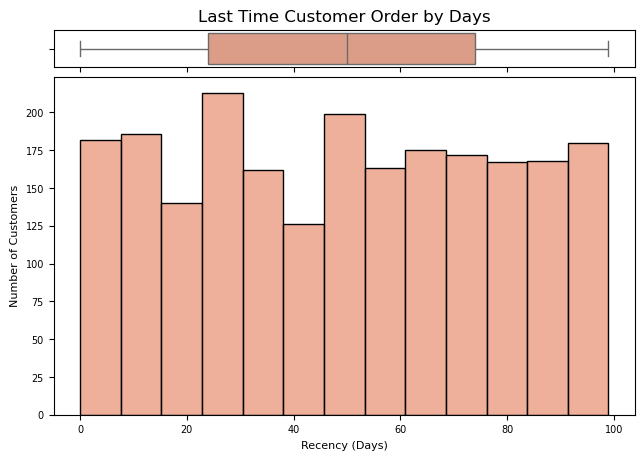

0.00     0.0
0.25    24.0
0.50    50.0
0.75    74.0
1.00    99.0
Name: Recency, dtype: float64

In [280]:
fig, (ax_top, ax_bot) = plt.subplots(nrows=2, ncols=1, figsize=(7.5, 5),gridspec_kw={
        'height_ratios': (0.10, 0.90),
        'hspace': 0.05
    })

sns.boxplot(data=sc_RFM, x='Recency', ax=ax_top, color='darksalmon')
ax_top.set_title('Last Time Customer Order by Days', fontsize=12)

sns.histplot(data=sc_RFM, x='Recency', ax=ax_bot, color='darksalmon')
ax_bot.set_xlabel('Recency (Days)', fontsize=8)
ax_bot.set_ylabel('Number of Customers', fontsize=8)
ax_bot.tick_params(axis='x', labelsize=7)
ax_bot.tick_params(axis='y', labelsize=7)

plt.show()
display(sc_RFM['Recency'].quantile([0, 0.25, 0.5, 0.75, 1]))

`Intrepertation`

Based on the distribution above, customers will be grouped based on the recency value into 4 groups:

- **4 (Active)**: made transactions less than the last 24 days
- **3 (Engaged)**: made transactions between 24 to 49 days
- **2 (Dormant)**: made transactions between 49 to 74 days
- **1 (Inactive)**: made transactions more than the last 74 days

In [282]:
# Recency Score
## Recency labeling: the smaller the Recency value, the higher the score
sc_RFM["RecencyScore"] = pd.qcut(sc_RFM["Recency"], q=4, labels = [4, 3, 2, 1]).astype(int)
sc_RFM[['ID','Recency','Frequency','Monetary','RecencyScore']].head()

,ID,Recency,Frequency,Monetary,RecencyScore
0,5524,58,22,1617,2
1,2174,38,4,27,3
2,4141,26,20,776,3
3,6182,26,6,53,3
4,5324,94,14,422,1


##### FREQUENCY SCORE

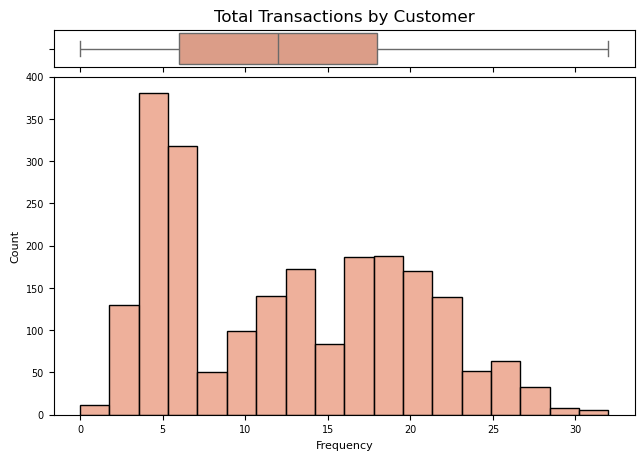

0.00     0.0
0.25     6.0
0.50    12.0
0.75    18.0
1.00    32.0
Name: Frequency, dtype: float64

In [284]:
fig, (ax_top, ax_bot) = plt.subplots(nrows=2, ncols=1, figsize=(7.5, 5),gridspec_kw={
        'height_ratios': (0.10, 0.90),
        'hspace': 0.05
    })

sns.boxplot(data=sc_RFM, x='Frequency', ax=ax_top, color='darksalmon')
ax_top.set_title('Total Transactions by Customer', fontsize=12)

sns.histplot(data=sc_RFM, x='Frequency', ax=ax_bot, color='darksalmon')
ax_bot.set_xlabel('Frequency', fontsize=8)
ax_bot.set_ylabel('Count', fontsize=8)
ax_bot.tick_params(axis='x', labelsize=7)
ax_bot.tick_params(axis='y', labelsize=7)

plt.show()
display(sc_RFM['Frequency'].quantile([0, 0.25, 0.5, 0.75, 1]))

`Intrepertation`

Based on the distribution above, customers will be grouped based on frequency into 4 groups referring to the number of transactions we determine;

- **4 (Frequent)**: making transactions more than 18 times
- **3 (Active)**: making transactions 13 to 18 times
- **2 (Moderate)**: making transactions 7 to 12 times
- **1 (Infrequent)**: making transactions only 0 to 6 times.

In [286]:
def f_score(x):
    if x<=6:
        return 1
    elif x <= 12:
        return 2
    elif x <= 18:
        return 3
    else:
        return 4

sc_RFM['FrequencyScore'] = sc_RFM['Frequency'].apply(f_score)
sc_RFM[['ID','Recency','Frequency','Monetary','RecencyScore','FrequencyScore']].head()

,ID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore
0,5524,58,22,1617,2,4
1,2174,38,4,27,3,1
2,4141,26,20,776,3,4
3,6182,26,6,53,3,1
4,5324,94,14,422,1,3


##### MONETARY SCORE

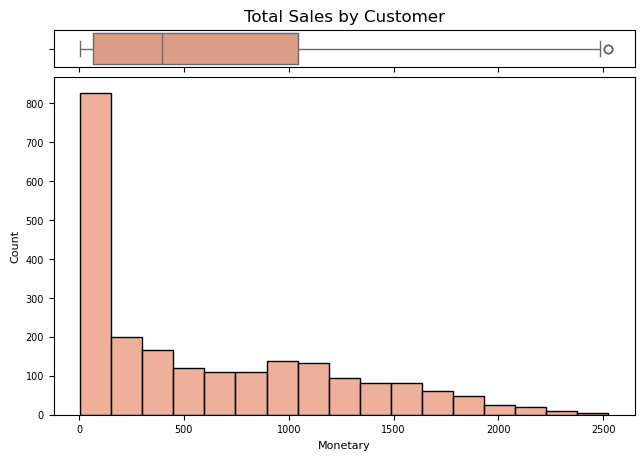

0.00       5.0
0.25      68.0
0.50     396.0
0.75    1045.0
1.00    2525.0
Name: Monetary, dtype: float64

In [288]:
fig, (ax_top, ax_bot) = plt.subplots(nrows=2, ncols=1, figsize=(7.5, 5),gridspec_kw={
        'height_ratios': (0.10, 0.90),
        'hspace': 0.05
    })

sns.boxplot(data=sc_RFM, x='Monetary', ax=ax_top, color='darksalmon')
ax_top.set_title('Total Sales by Customer', fontsize=12)

sns.histplot(data=sc_RFM, x='Monetary', ax=ax_bot, color='darksalmon')
ax_bot.set_xlabel('Monetary', fontsize=8)
ax_bot.set_ylabel('Count', fontsize=8)
ax_bot.tick_params(axis='x', labelsize=7)
ax_bot.tick_params(axis='y', labelsize=7)

plt.show()
display(sc_RFM['Monetary'].quantile([0, 0.25, 0.5, 0.75, 1]))

`Intrepertation`

Based on the distribution above, we will group customers based on their monetary into 4 groups, namely:

- **4 (Premium Spender)**: making transactions of more than 1048 dollars

- **3 (Significant Spender)**: making transactions between 396 to 1048 dollars

- **2 (Moderate Spender)**: making transactions between 69 to 396 dollars

- **1 (Budget Spender)**: making transactions of less than 69 dollars

In [290]:
# Monetary Score
## Mmnetary labeling: the smaller the Monetary value, the higher the score
sc_RFM["MonetaryScore"] = pd.qcut(sc_RFM["Monetary"], q=4, labels = [4, 3, 2, 1]).astype(int)
sc_RFM[['ID','Recency','Frequency','Monetary','RecencyScore','FrequencyScore','MonetaryScore']].head()

,ID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
0,5524,58,22,1617,2,4,1
1,2174,38,4,27,3,1,4
2,4141,26,20,776,3,4,2
3,6182,26,6,53,3,1,4
4,5324,94,14,422,1,3,2


##### RFM SCORE

In [292]:
# Calculating RFM Score 
sc_RFM['RFM_Score'] = sc_RFM['RecencyScore'] + sc_RFM['FrequencyScore'] + sc_RFM['MonetaryScore']
sc_RFM[['ID','Recency','Frequency','Monetary','RecencyScore','FrequencyScore','MonetaryScore','RFM_Score']].sample(5)

,ID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score
1095,9964,56,14,424,2,3,2,7
1256,9094,39,14,587,3,3,2,8
360,7274,87,21,2153,1,4,1,6
1136,10542,63,6,77,2,1,3,6
851,9477,0,17,544,4,3,2,9


In [293]:
# Create labels for each RFM Score
sc_RFM['Segment'] = pd.cut(sc_RFM["RFM_Score"], bins=4, labels = ['Basic', 'Middle', 'Premium', 'Elite'])
sc_RFM[['ID','Recency','Frequency','Monetary','RecencyScore','FrequencyScore','MonetaryScore','RFM_Score','Segment']].head()

,ID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Segment
0,5524,58,22,1617,2,4,1,7,Middle
1,2174,38,4,27,3,1,4,8,Premium
2,4141,26,20,776,3,4,2,9,Premium
3,6182,26,6,53,3,1,4,8,Premium
4,5324,94,14,422,1,3,2,6,Middle


In [294]:
sc_RFM['Segment'].value_counts()

Segment
Premium    1021
Middle     1020
Basic       109
Elite        83
Name: count, dtype: int64

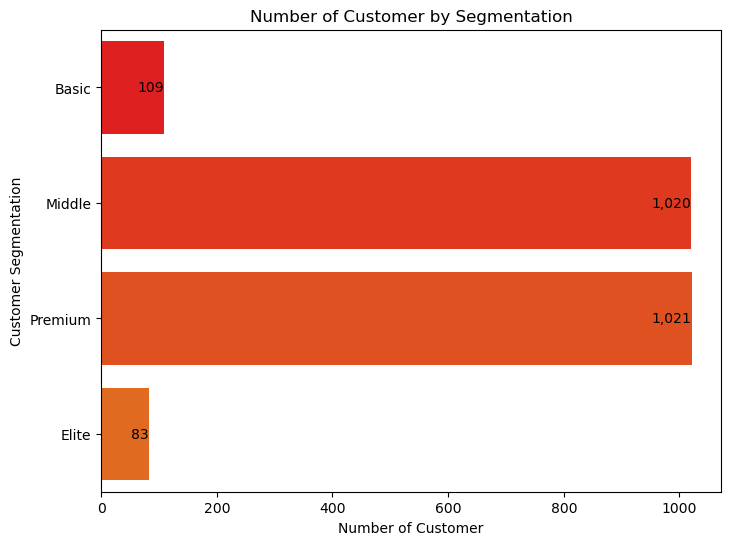

In [295]:
fig, ax = plt.subplots(figsize=(8, 6))
color_palette = sns.blend_palette(['red', 'orange'])

# Create count plot
ax = sns.countplot(
    data=sc_RFM,
    y='Segment',
    order=['Basic', 'Middle','Premium','Elite'],
    palette=color_palette
)

# Set title dan label
ax.set(
    title='Number of Customer by Segmentation',
    ylabel='Customer Segmentation',
    xlabel='Number of Customer'
)

# Add Label
for bar in ax.patches:
    x, y = bar.get_xy()
    ax.text(
        x + bar.get_width(),
        y + bar.get_height()/2,
        f'{bar.get_width():,.0f}',
        ha='right',
        va='center'
    )

plt.show()

In [296]:
sc_RFM.groupby('Segment').agg(
    n_customer=('ID', 'count'),
    median_recency=('Recency', 'median'),
    median_frequency=('Frequency', 'median'),
    median_monetary=('Monetary', 'median'),
).sort_values('median_monetary',ascending=False)

,n_customer,median_recency,median_frequency,median_monetary
Segment,,,,
Basic,109,84.0,11.0,948.0
Elite,83,10.0,21.0,795.0
Middle,1020,72.0,12.0,403.0
Premium,1021,26.0,11.0,317.0


In [297]:
sc_RFM_stats = sc_RFM[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count", "std"])
sc_RFM_stats.columns = sc_RFM_stats.columns.map('_'.join).str.strip('|')
sc_RFM_stats

,Recency_mean,Recency_median,Recency_count,Recency_std,Frequency_mean,Frequency_median,Frequency_count,Frequency_std,Monetary_mean,Monetary_median,Monetary_count,Monetary_std
Segment,,,,,,,,,,,,
Basic,84.853211,84.0,109,8.685690,10.779817,11.0,109,5.112363,807.834862,948.0,109,697.623857
Middle,70.728431,72.0,1020,17.884423,12.381373,12.0,1020,7.065420,629.866667,403.0,1020,627.899240
Premium,26.882468,26.0,1021,17.046128,12.285015,11.0,1021,7.389185,550.584721,317.0,1021,578.475196
Elite,11.602410,10.0,83,7.486475,19.807229,21.0,83,4.745878,726.746988,795.0,83,265.001649


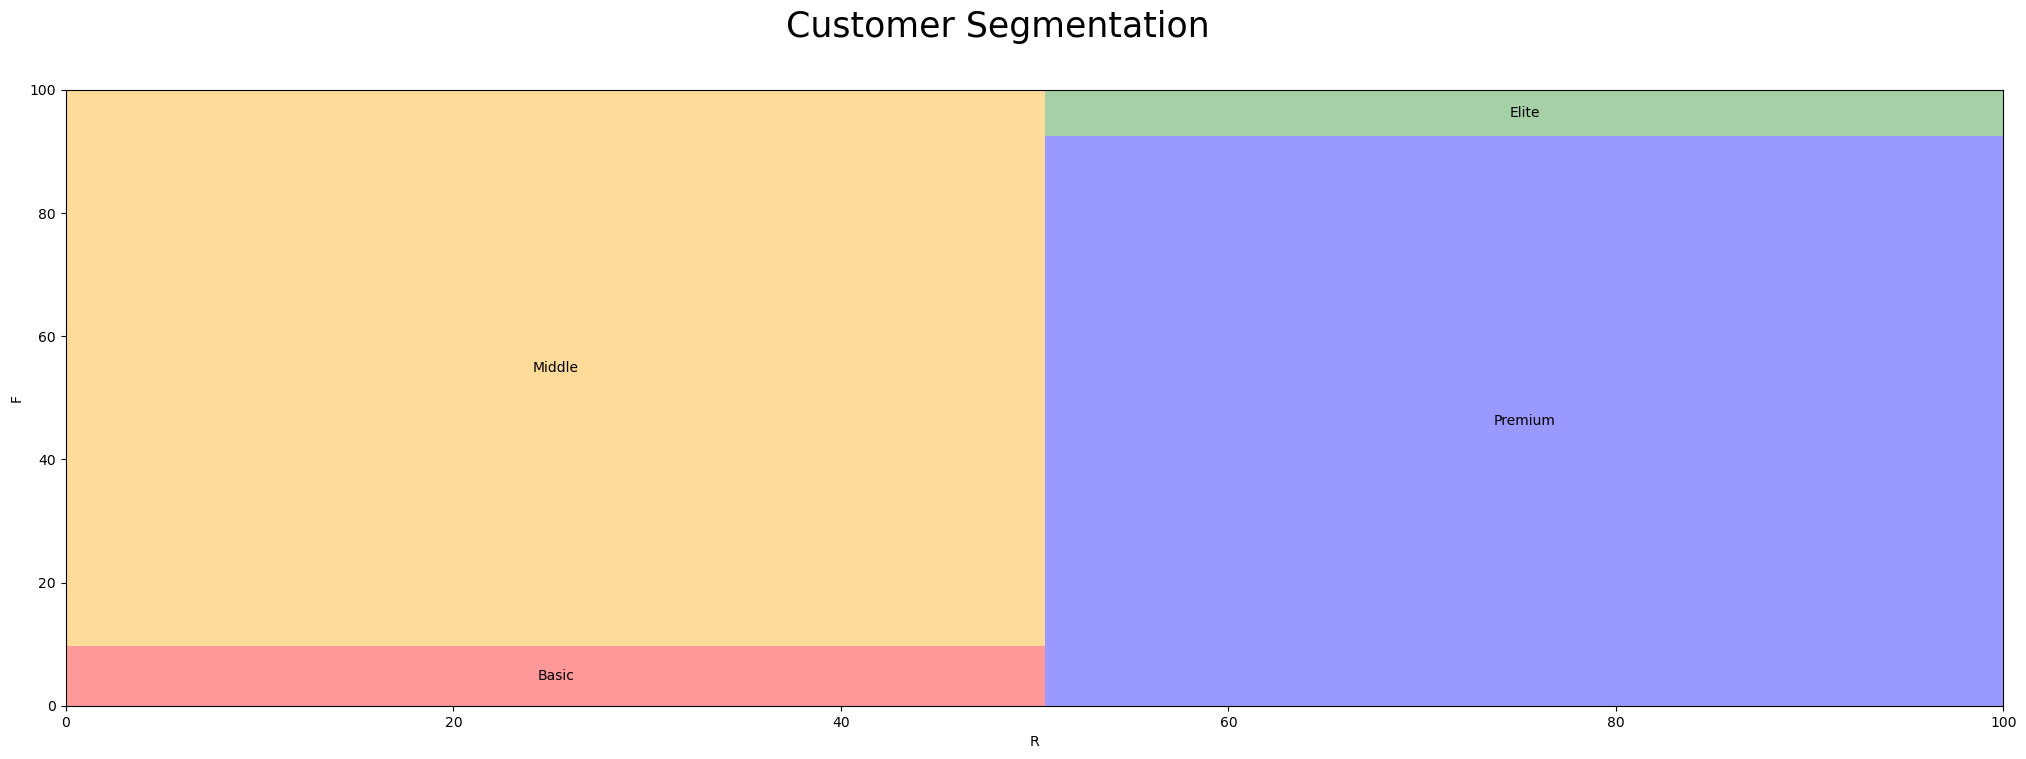

In [298]:
plt.figure(figsize = (25,8))
squarify.plot(sizes=sc_RFM_stats.Recency_count, label=sc_RFM_stats.index, 
              color=["red","orange","blue", "forestgreen"], alpha=.4 )
plt.suptitle("Customer Segmentation \n", fontsize=25);
plt.ylabel('F')
plt.xlabel('R')
plt.show()

#### 4.3.5 Customer Segmentation Based on the Number of Campaign Offers Received

In [300]:
sc_campaign = pd.merge(sc[['ID','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']],sc_RFM[['ID','Segment']], on='ID',how='inner')
display(sc_campaign.head())
print(sc_campaign[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].sum())

,ID,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Segment
0,5524,0,0,0,0,0,Middle
1,2174,0,0,0,0,0,Premium
2,4141,0,0,0,0,0,Premium
3,6182,0,0,0,0,0,Premium
4,5324,0,0,0,0,0,Middle


AcceptedCmp1    143
AcceptedCmp2     30
AcceptedCmp3    162
AcceptedCmp4    167
AcceptedCmp5    162
dtype: object


Based from this data above, the following graph will be created below.

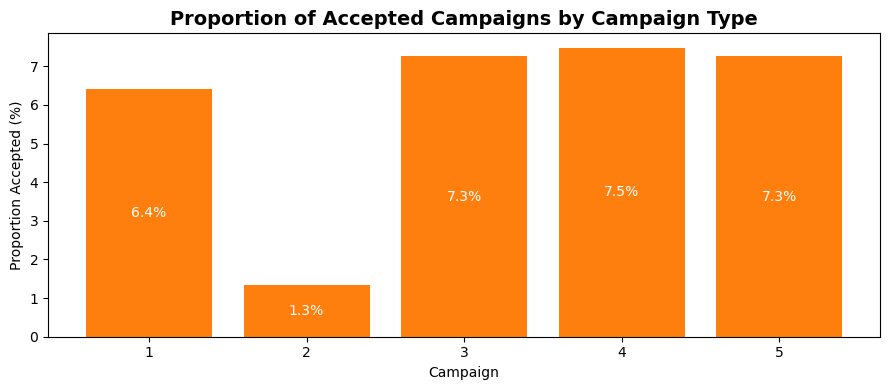

In [302]:
# Convert DataFrame to long format
sc_melted = sc_campaign.melt(id_vars=['Segment'], 
                              value_vars=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], 
                              var_name='Campaign', 
                              value_name='Accepted')

# Calculate the proportion of accepted campaigns by campaign type
proportions = sc_melted.groupby('Campaign')['Accepted'].mean().reset_index()
proportions['Accepted'] = proportions['Accepted'] * 100 

# Plot the graph 
fig, ax = plt.subplots(figsize=(9, 4))
bars = ax.bar(proportions['Campaign'], proportions['Accepted'], color='tab:orange')

# Add title and labels
plt.title('Proportion of Accepted Campaigns by Campaign Type', fontsize=14, fontweight='bold')
plt.xlabel('Campaign', fontsize=10)
plt.ylabel('Proportion Accepted (%)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.set_xticklabels([1, 2, 3, 4, 5])

# Add percentage labels inside each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.1f}%', ha='center', va='center', color='white', fontsize=10)

plt.tight_layout()
plt.show()

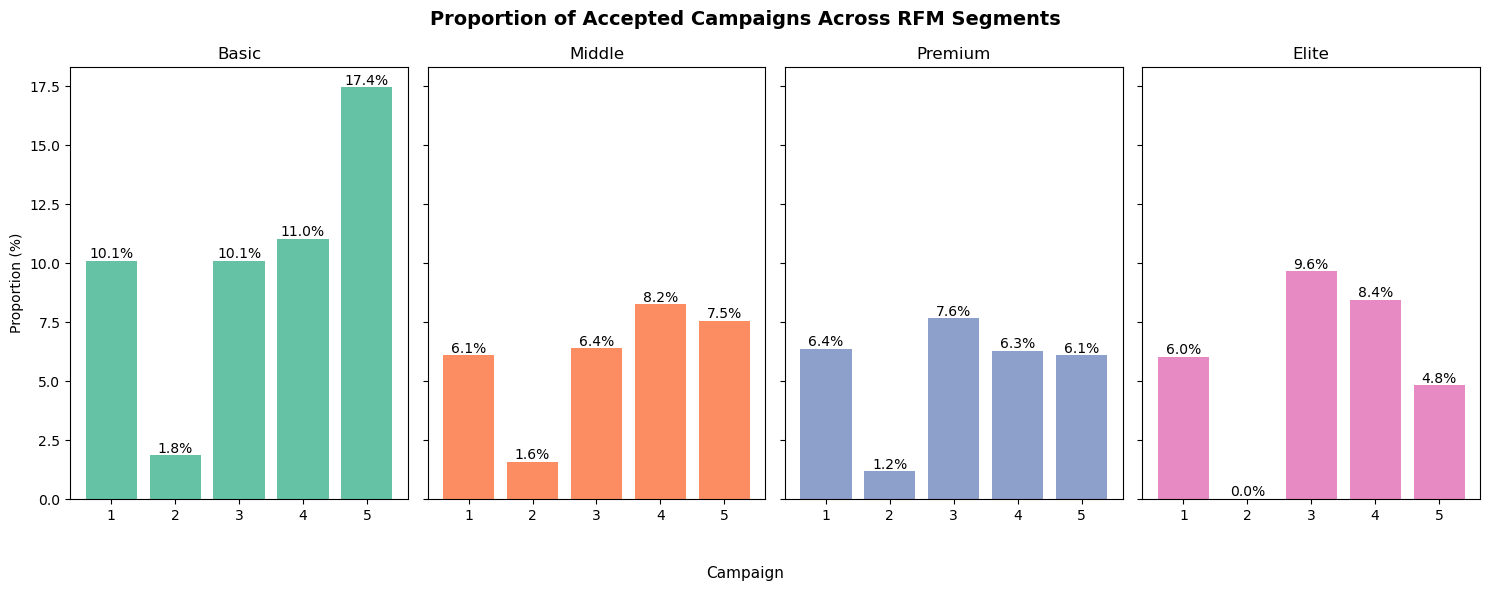

In [303]:
# Convert DataFrame to long format
sc_melted = sc_campaign.melt(id_vars=['Segment'], 
                             value_vars=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], 
                             var_name='Campaign', 
                             value_name='Accepted')

# Calculate the proportion of accepted campaigns
proportions = sc_melted.groupby(['Segment', 'Campaign'])['Accepted'].mean().reset_index()
proportions['Accepted'] = proportions['Accepted'] * 100  # Convert to percentage

# Pivot data for bar chart
pivot_table = proportions.pivot(index='Campaign', columns='Segment', values='Accepted').fillna(0)

# Prepare subplots
num_segments = len(pivot_table.columns)
fig, axes = plt.subplots(nrows=1, ncols=num_segments, figsize=(15, 6), sharey=True)

# Use a seaborn color palette
palette = sns.color_palette("Set2", num_segments)

# Plot each segment in a separate subplot
for i in range(num_segments):
    segment = pivot_table.columns[i]
    data = pivot_table[segment]
    ax = axes[i]
    ax.bar(data.index, data.values, color=palette[i])  # Use colors from the seaborn palette
    ax.set_title(segment)
    ax.set_xticks(range(len(data.index)))
    ax.set_xticklabels([1, 2, 3, 4, 5])  # Label x-axis as 1, 2, 3, 4, 5
    
    # Add percentage labels on each bar
    for j in range(len(data.values)):
        ax.text(j, data.values[j] + 0, f'{data.values[j]:.1f}%', ha='center', va='bottom', color='black')

# Add title for the entire plot
fig.suptitle('Proportion of Accepted Campaigns Across RFM Segments', fontsize=14, fontweight='bold')

# Set y-axis label only for the leftmost plot
axes[0].set_ylabel('Proportion (%)')

# Set a single x-axis label below all subplots
fig.text(0.5, 0.04, 'Campaign', ha='center', va='center', fontsize=11)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust rect to make space for x-axis labels
plt.show()

`Intrepertation`

Based from the two graphs above, overall percentages of **participation in each campaign by customers** are still below 10% of the total customer data.
Then, from the **proportion of each campaign**, it can be seen that **campaigns 1,3,4 and 5 a relatively similar proportion of participation**. However, the **second campaign** stands out with the **lowest participation rate**, with only **1.3%** of all customers participating. This trend is consistent across almost all RFM segments, indicating that **Campaign 2 was the least successful** or least appealing to customers. In addition, it can also be seen in the second graph where almost **all segments have the smallest proportion** of participation in the **second campaign**.

**Overall Insight**: 

The consistent trend across all RFM segments highlights the significantly *lower acceptance of Campaign 2*, suggesting that this campaign might need to be re-evaluated or redesigned to better engage customers. The Basic segment is *particularly responsive to Campaign 5*, while the *Elite segment shows the highest engagement in Campaign 3*.

In [305]:
# List of campaigns
list_campaign = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# List of RFM segments
rfm_segments = sc_campaign['Segment'].unique()

# Dictionary to store results
results = {}

# Iterate over each RFM segment
for segment in rfm_segments:
    print(f'\nChi-Square Test for segment {segment}:')
    
    # Get data for a specific RFM segment
    segment_data = sc_campaign[sc_campaign['Segment'] == segment]
    
    # Create a table for campaign participation
    campaign_table = pd.DataFrame({
        'AcceptedCmp1': segment_data['AcceptedCmp1'], 
        'AcceptedCmp2': segment_data['AcceptedCmp2'], 
        'AcceptedCmp3': segment_data['AcceptedCmp3'], 
        'AcceptedCmp4': segment_data['AcceptedCmp4'], 
        'AcceptedCmp5': segment_data['AcceptedCmp5'] }).apply(pd.Series.value_counts).fillna(0).astype(int) 
    
    # Print contingency table for checking 
    print("Campaign Table:") 
    print(campaign_table) 
    
    # Perform chi-square test for campaign participation 
    chi2, p, dof, ex = chi2_contingency(campaign_table) 
    
    # Save results 
    results[segment] = { 'Chi2 Statistics': chi2, 'p-value': p } 
    
    print(f"Chi2 Statistics: {chi2}")
    print(f"p-value: {p}")
    
    if p < 0.05:
        print(f"There is a significant difference in interest in the campaign in the {segment} segment.\n")
        print('------------------------------------------------------------------------------------')
    else:
        print(f"There is no significant difference in interest in the campaign in the {segment} segment.\n")
        print('------------------------------------------------------------------------------------')
        
# Show the overall results
print('\nChi-Square Test Results:')
for segment, stats in results.items():
    print(f"Segment {segment}: Chi2 Statistic = {stats['Chi2 Statistics']}, p-value = {stats['p-value']}")


Chi-Square Test for segment Middle:
Campaign Table:
   AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5
0           958          1004           955           936           943
1            62            16            65            84            77
Chi2 Statistics: 49.44046025196435
p-value: 4.725146901103834e-10
There is a significant difference in interest in the campaign in the Middle segment.

------------------------------------------------------------------------------------

Chi-Square Test for segment Premium:
Campaign Table:
   AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5
0           956          1009           943           957           959
1            65            12            78            64            62
Chi2 Statistics: 48.97326829671335
p-value: 5.914286977057963e-10
There is a significant difference in interest in the campaign in the Premium segment.

-----------------------------------------------------------------------

A ***Chi-square*** test was conducted to determine the proportion of campaign participation in each segment and assess whether there is a significant difference in participation across different campaigns within each segment.

**Overall Insight**

- **Middle Segment**: There is a significant difference in participation across campaigns. The **most followed campaigns**, according to the previous graph, **are campaigns 4 and 5**.

- **Premium Segment**: **Similar to the Middle segment**, there is a significant difference in participation, with **campaign 3 being the most popular**.

- **Elite Segment**: There is no significant difference in participation across the campaigns, indicating a **relatively uniform interest level among the campaigns** in this segment.

- **Basic Segment**: There is a significant difference in participation, with **campaign 5 showing the highest** interest among customers in this segment.

`Highlight`

**All segments**, *except the Elite* segment, **have p-values below 0.05**, indicating that there is a **significant difference in the proportion of participation** across the campaigns for these segments. This shows that customers in this segment show **varying levels of interest** in different campaigns.

However, for the **Elite** segment, the **p-value is 0.0725**, which is above the **0.05 threshold**. This indicates that the difference in the proportion of participation between campaigns for this segment is **not statistically significant**. The lack of significance in this segment could be due to the **relatively small number of customers**, making it **difficult to detect** any meaningful differences in participation.

#### 4.3.6 Customer Segmentation Based on Number of Purchases in Product Categories

In [308]:
sc_product = pd.merge(sc[['ID','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']],sc_RFM[['ID','Segment']], on='ID',how='inner')
sc_product.head()

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Segment
0,5524,635,88,546,172,88,88,Middle
1,2174,11,1,6,2,1,6,Premium
2,4141,426,49,127,111,21,42,Premium
3,6182,11,4,20,10,3,5,Premium
4,5324,173,43,118,46,27,15,Middle


In [309]:
sc_product[['Segment','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].groupby(by='Segment').sum()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Segment,,,,,,
Basic,41411,3545,27615,5566,4294,5623
Middle,322639,27248,179027,39150,28409,45991
Premium,285082,24982,151868,34604,24142,41469
Elite,29775,2955,14654,4295,3688,4953


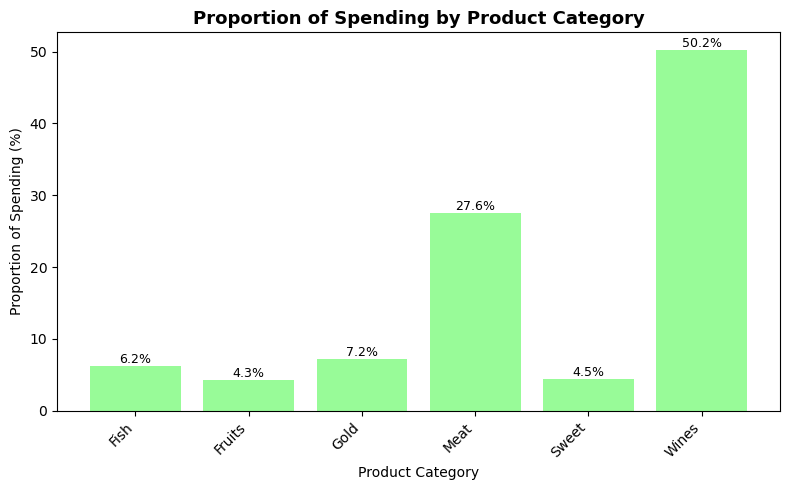

In [310]:
# Convert DataFrame to long format
sc_melted = sc_product.melt(id_vars=['Segment'],
                            value_vars=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
                            var_name='Product',
                            value_name='Spending')

# Calculate the proportion of spending for each product category
proportions = sc_melted.groupby('Product')['Spending'].sum() / sc_melted['Spending'].sum() * 100

# Define x labels
x_labels = ['Fish', 'Fruits', 'Gold', 'Meat', 'Sweet', 'Wines']

# Create a bar plot for proportions
plt.figure(figsize=(8, 5))
plt.bar(x_labels, proportions, color='palegreen')

# Add a title, label, and percentage to each bar
plt.title('Proportion of Spending by Product Category', fontsize=13, fontweight='bold')
plt.xlabel('Product Category', fontsize=10)
plt.ylabel('Proportion of Spending (%)', fontsize=10)
plt.xticks(rotation=45, ha='right', size=10)
plt.yticks(size=10)

# Add percentage labels directly above each bar
for i in range(len(proportions)):
    plt.text(i, proportions.iloc[i] + 0, f'{proportions.iloc[i]:.1f}%', ha='center', va='bottom', fontsize=9)

# Display plot
plt.tight_layout()
plt.show()

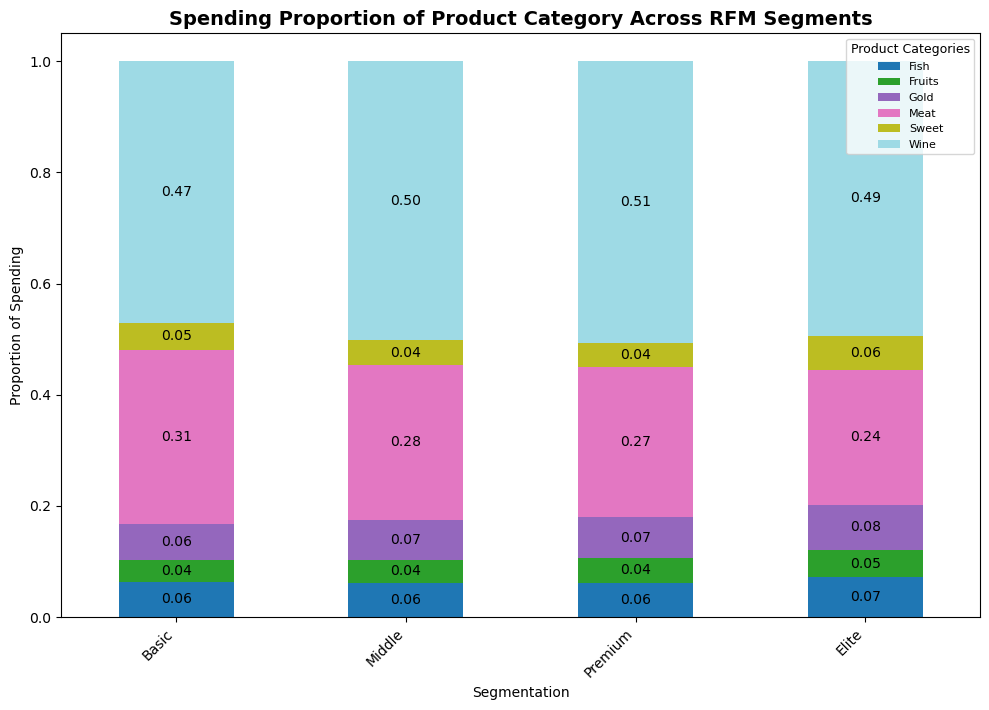

In [311]:
# Convert DataFrame to long format
sc_melted = sc_product.melt(
    id_vars=['Segment'],
    value_vars=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
    var_name='Product',
    value_name='Spending'
)

# Calculate total spending per segment
total_spending_per_segment = sc_melted.groupby('Segment')['Spending'].sum()

# Calculate the proportion of spending per product in each segment
sc_melted['Proportion'] = sc_melted.apply(
    lambda x: x['Spending'] / total_spending_per_segment[x['Segment']], axis=1
)

# Group data by Segment and Product for plotting
grouped = sc_melted.groupby(['Segment', 'Product'])['Proportion'].sum().unstack().fillna(0)

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(10, 9))

# Plot each product category with different colors
grouped.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')

# Add labels and title
ax.set_xlabel('Segmentation')
ax.set_ylabel('Proportion of Spending')
ax.set_title('Spending Proportion of Product Category Across RFM Segments',size=14, fontweight='bold')
ax.set_xticklabels(grouped.index, rotation=45, ha='right')

# Add percentage labels to bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.2f')

# Add a legend at the bottom
ax.legend(
    title='Product Categories',
    labels=['Fish', 'Fruits', 'Gold', 'Meat', 'Sweet', 'Wine'],
    fontsize=8,
    title_fontsize=9,
    loc='upper right'
    #bbox_to_anchor=(0.5, -0.5), loc='upper center', ncol=len(grouped.columns)
)

# Customize layout
plt.tight_layout(rect=[0, 0.2, 1, 1])
plt.show()

`Intrepertation`

Based on both of the provided graph, the **product category with the highest sales value** are **Wines (50.2%)** and Meat **(27.6%)**. This **suggests** that these categories are **highly valued** by consumers, likely due to high demand. 

Then, we can observe the following insights regarding the **spending proportion of different product categories** across various RFM segments:

1. **Wine and Meat Products Dominate**: Across all customer segments (Basic, Middle, Premium, Elite), Wine and Meat products consistently have the highest spending proportions. For instance, the *Wine* category accounts for around **47-51%** of spending across segments, and **Meat** products range between **24-31%**. These two categories clearly dominate customer spending.

2. **Relatively Consistent Spending Across Segments**: The proportions of spending in other product categories (Fish, Fruits, Gold, Sweet) are **relatively consistent** across the segments. These categories each contribute **a smaller portion to the total spending**, typically **ranging from 4% to 8%**, depending on the segment.

3. **Segment Differences**: While the overall spending patterns are similar across segments, the **Elite segment shows a slightly higher spending proportion on Gold products (6%) and Fish products (7%)** compared to other segments. Conversely, the **Basic segment has a slightly lower proportion of spending on these categories**

#### 4.3.7 Customer Segmentation by Transaction Platform

In [314]:
sc_platform = pd.merge(sc[['ID','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']],sc_RFM[['ID','Segment']], on='ID',how='inner')
sc_platform.head()

,ID,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Segment
0,5524,8,10,4,Middle
1,2174,1,1,2,Premium
2,4141,8,2,10,Premium
3,6182,2,0,4,Premium
4,5324,5,3,6,Middle


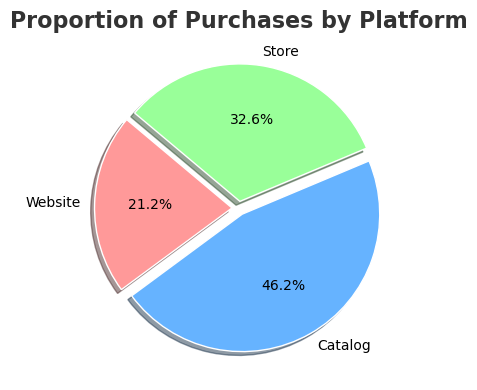

In [315]:
# Convert DataFrame to long format
sc_melted = sc_platform.melt(
    id_vars=['Segment'], 
    value_vars=['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], 
    var_name='Platform', 
    value_name='Purchases'
)

# Calculate total purchases per platform
total_purchases_per_platform = sc_melted.groupby('Platform')['Purchases'].sum()

# Calculate total purchases for normalization
total_purchases_all = total_purchases_per_platform.sum()

# Calculate the proportion of purchases for each platform
proportions = (total_purchases_per_platform / total_purchases_all) * 100

# Define the platform labels to match the data
platform_labels = ['Website', 'Catalog', 'Store']
explode = (0.05, 0.05, 0.05) 
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Create a pie plot for the proportions with additional styling
plt.figure(figsize=(8, 4))
plt.pie(
    proportions, 
    labels=platform_labels, 
    autopct='%1.1f%%', 
    colors=colors,  
    startangle=140, 
    explode=explode,
    shadow=True, 
    wedgeprops=dict(edgecolor='w', linewidth=1)
)


plt.title('Proportion of Purchases by Platform', fontsize=16, fontweight='bold', color='#333333')
plt.tight_layout()
plt.show()

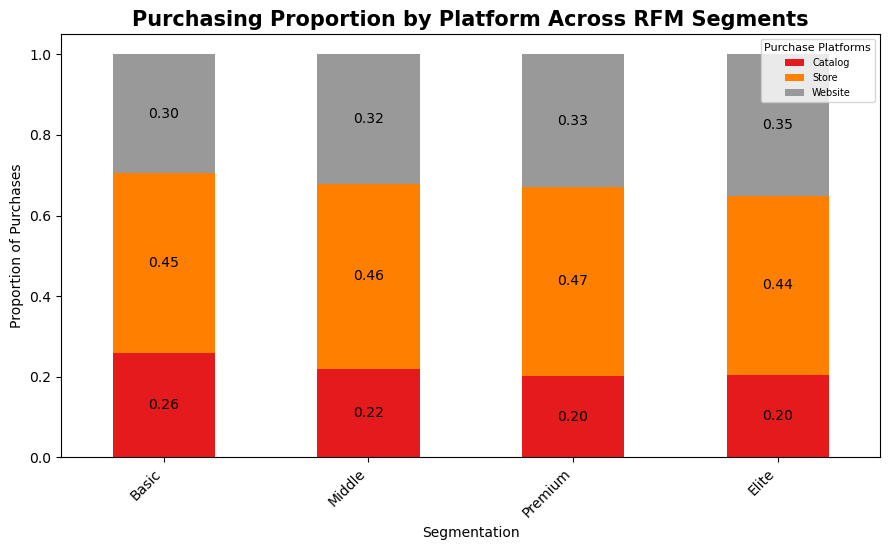

In [316]:
# Convert DataFrame to long format
sc_melted = sc_platform.melt(id_vars=['Segment'], 
                             value_vars=['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], 
                             var_name='Platform', 
                             value_name='Purchases')

# Calculate total purchases per segment for normalization
total_purchases_per_segment = sc_melted.groupby('Segment')['Purchases'].sum()

# Calculate the proportion of purchases per platform within each segment
sc_melted['Proportion'] = sc_melted.apply(lambda x: x['Purchases'] / total_purchases_per_segment[x['Segment']], axis=1)

# Group by Segment and Platform for plotting
grouped = sc_melted.groupby(['Segment', 'Platform'])['Proportion'].sum().unstack().fillna(0)

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(9, 7))

# Plot each platform category with a different color
grouped.plot(kind='bar', stacked=True, ax=ax, colormap='Set1')

# Add labels and title
ax.set_xlabel('Segmentation')
ax.set_ylabel('Proportion of Purchases')
ax.set_title('Purchasing Proportion by Platform Across RFM Segments', fontsize=15, fontweight='bold')
ax.set_xticklabels(grouped.index, rotation=45, ha='right')

# Add percentage labels on the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.2f')

# Add legend below the plot
ax.legend(title='Purchase Platforms',
          labels=['Catalog', 'Store','Website'],
          fontsize=7,
          title_fontsize=8,
          loc='upper right',
          #bbox_to_anchor=(0.5, -0.3), 
          #ncol=3
         )

# Adjust layout
plt.tight_layout(rect=[0, 0.2, 1, 1])

plt.show()

`Intrepertation`

Based on both of the provided graph, overall **46.1% of customers** shop more **in-store**

**Overall Insights**:

- **Store** purchases are most common in the **Basic**, **Middle**, and **Premium** segments.
- The **Elite** segment shows a higher preference for the **Website** compared to other segments.
- **Catalog purchases decrease** as we move **from Basic to Elite segments**.

This analysis indicates that the **Elite** segment **leans more toward Website** transactions, whereas other **segments are more inclined towards Store purchases**. The **Catalog platform** sees **less usage across all segments**, with **declining** interest **in higher** segments.

## **V. Conclusions**

Based on intrepertation of the analysis earlier, here's how to address the conclusions about factors influencing profitability and tailoring promotions for different customer segments:

**1. Factors Influencing Profitability and How to Increase It**
- **Product Popularity**: The analysis indicates that **Wine and Meat products are the most popular across all segments**, driving higher revenue. Focusing on these products through targeted promotions or bundling them with other items can enhance sales and profitability.
- **Campaign Effectiveness**: **Campaign 2's notably lower participation** rate signals a potential misalignment with customer interests. Re-evaluating or redesigning this campaign to better appeal to customer needs can improve overall engagement and profitability. Additionally, emphasizing **successful campaigns like Campaign 5 for the Basic** segment and **Campaign 3 for the Elite** segment can optimize promotional efficiency.
- **Channel Preference**: The trend of **Store purchases dominating the Basic, Middle, and Premium** segments, while the **Elite segment prefers Website** transactions, highlights the importance of channel-specific strategies. Ensuring that in-store promotions cater to the majority segments and enhancing the online shopping experience for the Elite segment can drive profitability.

**2. Differentiating Customer Segments and Appropriate Promotions**
- **Basic Segment**: This segment is **highly responsive to Campaign 5** and prefers **in-store shopping**. Promotions for this segment **should focus on in-store** offers, discounts on popular items like Wine and Meat, and perhaps bundle deals that emphasize value for money.
- **Middle Segment**: **Similar to the Basic** segment, the **Middle** segment **prefers Store purchases** and responds **well to traditional campaigns**. Promotions could include loyalty rewards, special in-store events, or personalized discounts on high-demand products.
- **Premium Segment**: The **Premium** segment also **favors Store purchases** but has a slightly more diverse interest. Targeted campaigns **focusing on both Store and online platforms**, with **special attention to premium products like Gold and Fish**, could be effective.
- **Elite Segment**: The **Elite segment** shows a higher engagement with **online (Website)** transactions and **Campaign 3**. Promotions for this segment should focus on **exclusive online deals**, **premium product offerings**, and perhaps **personalized experiences** or **early access** to new product launches**.

## **VI. Actionable Recommendation**

| Segment         | Interpretation                                                        | Actionable Recommendation                                                                                                                                    |
|-----------------|-----------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Basic Segment   | Highly responsive to Campaign 5 and prefers in-store shopping.        | - **Develop bundle offers** combining Wine, Meat, and complementary products, offering a 15% discount for in-store purchases to drive sales.                 |
| Middle Segment  | Prefers Store purchases and responds well to traditional campaigns.   | - **Introduce a "Refer a Friend" program** where referrals result in in-store discounts, encouraging loyal customers to bring in new buyers.                 |
| Premium Segment | Favors Store purchases with a diverse product interest, including Gold and Fish. | - **Launch a "Gold Member's Club" offering personalized shopping assistance in-store**, exclusive early access to new premium product lines, and tailored promotions. |
| Elite Segment   | Higher engagement with online transactions (Website) and responsive to Campaign 3. | - **Provide "Early Access to New Products" through the website**, allowing Elite members to purchase new arrivals before they are available to the general public. |